In [1]:
# 경고 메시지가 안나오게..
import warnings
warnings.filterwarnings('ignore')

# 기본
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')
import missingno

# KFold
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 교차 검증 함수
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

# 학습 데이터와 검증데이터로 나누는 함수
from sklearn.model_selection import train_test_split

# 데이터 전처리
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 하이퍼 파라미터 튜닝
from sklearn.model_selection import GridSearchCV

# 평가함수
from sklearn.metrics import accuracy_score

# 머신러닝 알고리즘 - 분류
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier

# 머신러닝 알고리즘 - 회귀
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

# 군집
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift

# 차원축소
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 딥러닝
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

# 다중분류를 위한 핫-윈 인코더
from keras.utils import to_categorical

# 저장된 딥러닝 모델을 복구하는 함수
from keras.models import load_model

# epoch마다 모델을 저장하는 함수
from keras.callbacks import ModelCheckpoint

# 더이상 성능 향상이 이루어지지 않는다면 조기 중단시킬 수 있는 함수
from keras.callbacks import EarlyStopping

# 저장
import pickle

# 시간 모듈
import time

# 그래프 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False

In [2]:
from keras.datasets import mnist
from keras.utils import np_utils

In [3]:
# 랜덤 시드 설정
np.random.seed(3)
tf.random.set_seed(3)

In [4]:
# MNIST 데이터 불러오기
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [5]:
# 2차원으로 되어 있는 이미지 한장의 데이터를 1차원으로 변환한다.
X_train = X_train.reshape(X_train.shape[0], 784)
# 학습 효율을 높히기 위해 모든 값을 0에서 1사이로 조정한다.
X_train = X_train.astype('float32')
X_train = X_train / 255

X_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [6]:
# 2차원으로 되어 있는 이미지 한장의 데이터를 1차원으로 변환한다.
X_test = X_test.reshape(X_test.shape[0], 784)
# 학습 효율을 높히기 위해 모든 값을 0에서 1사이로 조정한다.
X_test = X_test.astype('float32')
X_test = X_test / 255

X_test[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [7]:
# 결과 데이터 핫 윈 인코딩
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [8]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [9]:
# 모델 설정
model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [10]:
# 모델 컴파일
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
modelpath = 'models/{epoch}-{val_loss}.hdf5'
callback1 = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
callback2 = EarlyStopping(monitor='val_loss', patience=10)

In [12]:
# 학습한다.
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, 
         batch_size=200, verbose=0, callbacks=[callback1, callback2])


Epoch 00001: val_loss improved from inf to 0.14736, saving model to models\1-0.1473580002784729.hdf5

Epoch 00002: val_loss improved from 0.14736 to 0.10181, saving model to models\2-0.10181364417076111.hdf5

Epoch 00003: val_loss improved from 0.10181 to 0.08941, saving model to models\3-0.0894077718257904.hdf5

Epoch 00004: val_loss improved from 0.08941 to 0.07792, saving model to models\4-0.07792311161756516.hdf5

Epoch 00005: val_loss improved from 0.07792 to 0.07471, saving model to models\5-0.07470513880252838.hdf5

Epoch 00006: val_loss improved from 0.07471 to 0.06669, saving model to models\6-0.06668872386217117.hdf5

Epoch 00007: val_loss improved from 0.06669 to 0.06566, saving model to models\7-0.06566094607114792.hdf5

Epoch 00008: val_loss improved from 0.06566 to 0.06271, saving model to models\8-0.0627075657248497.hdf5

Epoch 00009: val_loss did not improve from 0.06271

Epoch 00010: val_loss improved from 0.06271 to 0.06228, saving model to models\10-0.06228461489081

In [14]:
# 모델 가져오기
best_model = load_model('models/13-0.059057727456092834.hdf5')
best_model

In [15]:
# 정확도 측정
model.evaluate(X_test, y_test)[1]

313/313 [==============================] - 1s 2ms/step - loss: 0.0679 - accuracy: 0.9845


0.984499990940094

In [16]:
# 테스트 셋의 오차값
y_vloss = history.history['val_loss']
y_vloss

[0.1473580002784729,
 0.10181364417076111,
 0.0894077718257904,
 0.07792311161756516,
 0.07470513880252838,
 0.06668872386217117,
 0.06566094607114792,
 0.0627075657248497,
 0.06316380947828293,
 0.06228461489081383,
 0.06350044906139374,
 0.07168073207139969,
 0.059057727456092834,
 0.06335721164941788,
 0.06714801490306854,
 0.06469616293907166,
 0.06489945948123932,
 0.06606870889663696,
 0.07871313393115997,
 0.07426772266626358,
 0.0712011381983757,
 0.06830044835805893,
 0.06791386008262634]

In [17]:
# 학습 데이터의 오차
y_loss = history.history['loss']
y_loss

[0.30276593565940857,
 0.12359116226434708,
 0.08107718080282211,
 0.05995245650410652,
 0.04513957351446152,
 0.03476933017373085,
 0.026676421985030174,
 0.0212258193641901,
 0.015563988126814365,
 0.011774175800383091,
 0.009554578922688961,
 0.007446902804076672,
 0.006425831466913223,
 0.004073617979884148,
 0.004635656252503395,
 0.003111758269369602,
 0.002005206188187003,
 0.0020397526677697897,
 0.009337035939097404,
 0.011506019160151482,
 0.003107343800365925,
 0.0010476908646523952,
 0.0005574481911025941]

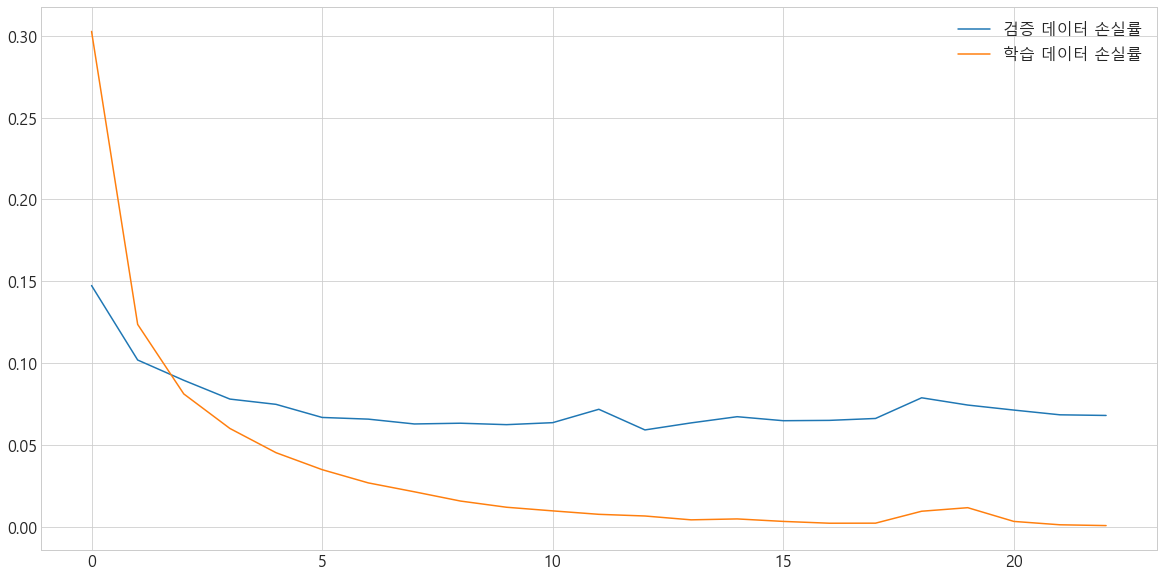

In [18]:
# 그래프
x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, label='검증 데이터 손실률')
plt.plot(x_len, y_loss, label='학습 데이터 손실률')
plt.legend()
plt.show()